# **Análise de Dados e Visualização para Tomada de Decisões em Publicidade**

### **Teste Técnico - Analista de Dados Jr - RBS**

#### Bruno Di Franco Albuquerque

## **Descrição do Teste:**

Neste teste, os candidatos deverão realizar uma análise de dados simples relacionada a campanhas publicitárias e criar visualizações claras para ajudar na tomada de decisões de negócios. Eles terão acesso a um conjunto de dados fictício que contém informações sobre campanhas publicitárias e desempenho das mesmas. 

Vamos começar importando as bibliotecas necessárias para a análise:

In [1]:
import pandas as pd
import plotly.express as px

import plotly.io as pio
pio.renderers.default = "png"

# Funções construídas por mim
from utils.common import adf_test, teste_espectro_fourier

Agora podemos ler os dados e visualizar uma amostra dos mesmos:

In [2]:
df = pd.read_csv("Base de dados - Case Analista Jr - RBS Performance.csv", sep=";")
df.sample(5)

,advertiserName,date,creativeType,deviceCategoryName,totalLineItemLevelImpressions,totalLineItemLevelClicks,totalLineItemLevelCtr,clickThroughConversions,viewThroughConversions
3288,Cliente 1,14/07/2023,Programmatic,Tablet,14562,276,"0,01895",161,500
6469,Cliente 1,24/08/2023,Programmatic,Smartphone,19555,440,"0,02250",304,431
4906,Cliente 1,04/08/2023,Custom,Tablet,49618,184,"0,00371",115,211
3800,Cliente 1,20/07/2023,Programmatic,SmartTV,44807,159,"0,00355",18,92
4352,Cliente 1,27/07/2023,Custom template,Desktop,49164,23,"0,00047",15,440


## **Tarefas:**

### 1. **Exploração de Dados**

#### 1.1. **Examinar a estrutura do conjunto de dados (quantidade de linhas e colunas)**

In [3]:
qtd_linhas = df.shape[0]
qtd_colunas = df.shape[1]

print(f"A base de dados possui {qtd_linhas} linhas e {qtd_colunas} colunas.")

A base de dados possui 7000 linhas e 9 colunas.


#### 1.2. **Identificar as principais variáveis presentes**

In [4]:
df.dtypes

advertiserName                   object
date                             object
creativeType                     object
deviceCategoryName               object
totalLineItemLevelImpressions     int64
totalLineItemLevelClicks          int64
totalLineItemLevelCtr            object
clickThroughConversions           int64
viewThroughConversions            int64
dtype: object

Ao analisar os tipos de cada variável, identificam-se duas variáveis que podem ser convertidas para tipos mais apropriados em relação ao seu significado:

- `date`, que é a data, porém está como `object`.
- `totalLineItemLevelCtr`, que é a Taxa de Cliques (click through rate), está como `object`, mas deveria ser um `float`.

In [5]:
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")
df["totalLineItemLevelCtr"] = df["totalLineItemLevelCtr"].str.replace(",", ".").astype(float)

Agora o tipo e formato dessas duas variáveis estão mais apropriados.

In [6]:
print(df[["date", "totalLineItemLevelCtr"]].dtypes)
df[["date", "totalLineItemLevelCtr"]].sample(5)

date                     datetime64[ns]
totalLineItemLevelCtr           float64
dtype: object


,date,totalLineItemLevelCtr
2697,2023-07-07,0.00769
1023,2023-06-15,0.00864
3286,2023-07-14,0.00232
3939,2023-07-22,0.00185
3610,2023-07-18,0.00466


Agora podemos seguir para a análise das "principais variáveis presentes":

As variáveis presentes podem ser classificadas em 3 grupos:

Primeiro grupo:

- Esse primeiro grupo representa as variáveis categóricas presentes na base de dados.

| **Nome da Variável** | **Significado** | **Tipo da Variável** |
|----------------------|-----------------|----------------------|
|  advertiserName        |   Nome do Cliente              |    objeto, string                  |
| creativeType                     | Tipo do Criativo                | objeto, string          |
|   deviceCategoryName       |  Categoria do dispositivo                  |  objeto, string    |

Segundo grupo:

- No segundo grupo temos apenas uma variável, que é a data, sendo, portanto, uma variável temporal, que pode ser muito útil para visualizações de séries temporais.

| **Nome da Variável** | **Significado** | **Tipo da Variável** |
|----------------------|-----------------|----------------------|
|  date        |   Data de exibição do anúncio              |    datetime, variável temporal                |

Terceiro grupo:

- Esse último grupo representa as variáveis numéricas, podendo ser encaradas como KPI's para publicidade, como indicadores de conversão, taxa de cliques, etc. **Portanto, se tivermos que elencar as "principais variáveis presentes" seriam exatamente as desse terceiro grupo.**

| **Nome da Variável** | **Significado** | **Tipo da Variável** |
|----------------------|-----------------|----------------------|
|  totalLineItemLevelImpressions         |    Impressões totais             |    numérica, integer              |
| totalLineItemLevelClicks               | Cliques totais             | numérica, integer        |
|   totalLineItemLevelCTR                |  Taxa de Cliques (click through rate), ou seja,   Cliques totais  /  Impressões totais  |  numérica, float    |
| clickThroughConversions                | Conversões diretas (oriundas de clique)        | numérica, integer        |
|   viewThroughConversions               |  Conversões indiretas (não relacionadas ao último clique)    |  numérica, integer   |

### 2. **Análise Descritiva**

#### 2.1. **Qual é a média de conversões por tipo de criativo?**

In [7]:
df_aux = df[["creativeType","clickThroughConversions", "viewThroughConversions"]]
df_aux.groupby("creativeType").mean().reset_index()

,creativeType,clickThroughConversions,viewThroughConversions
0,Custom,120.087126,248.613784
1,Custom template,135.234583,255.675937
2,DoubleClick Rich Media,118.611321,250.001258
3,HTML5,129.979747,245.181013
4,Image,124.820253,260.121519
5,Other,127.217808,250.510959
6,Programmatic,123.594221,251.548995
7,Third-party,127.568831,255.092208
8,Video creative sets,123.476126,246.798090


Organizando em um table do markdown:

|     Tipo do Criativo           |  Média de Conversões Diretas  |  Média de Conversões Indiretas |
|---------------------------|---------------------------|--------------------------|
| Custom                    | 120.08                 | 248.61               |
| Custom template           | 135.23                 | 255.68               |
| DoubleClick Rich Media    | 118.61                 | 250.01               |
| HTML5                     | 129.98                | 245.18               |
| Image                     | 124.82                | 260.12               |
| Other                     | 127.22               | 250.51               |
| Programmatic              | 123.59                | 251.55               |
| Third-party               | 127.57                | 255.09               |
| Video creative sets       | 123.48                | 246.79              |


#### 2.2. **Quais são os tipos de criativos mais eficazes em termos de conversões?**

Uma forma de avaliar a eficácia de cada criativo é calcularmos a taxa de conversão de cada criativo. A taxa de conversão, para nosso caso, pode ser calculada da seguinte forma:

Taxa de Conversão = $\frac{Número\ total\ de\ conversões}{Número\ total\ de\ impressões}$

*Outra forma de avaliar a eficácia também seria usando a variável de "Click through rate", porém como estamos interessados na eficácia em termos de **conversão** será utilizada somente a taxa de conversão.*

Primeiro vamos somar o total de conversões diretas, indiretas e de impressões totais por cada dia e cada criativo:

In [8]:
df_conv = (df[[
               "date",
               "creativeType",
               "clickThroughConversions", 
               "viewThroughConversions", 
               "totalLineItemLevelImpressions"]]
               .groupby(["creativeType", "date"])
               .sum()
               .reset_index())

# total de conversões
df_conv["total_conv"] = df_conv["clickThroughConversions"] + df_conv["viewThroughConversions"]

In [9]:
df_conv

,creativeType,date,clickThroughConversions,viewThroughConversions,totalLineItemLevelImpressions,total_conv
0,Custom,2023-06-02,1811,3977,314330,5788
1,Custom,2023-06-03,417,502,97802,919
2,Custom,2023-06-04,1382,1516,234145,2898
3,Custom,2023-06-05,1398,2632,185084,4030
4,Custom,2023-06-06,861,2779,129600,3640
...,...,...,...,...,...,...
805,Video creative sets,2023-08-26,604,2386,229154,2990
806,Video creative sets,2023-08-27,1207,2218,199445,3425
807,Video creative sets,2023-08-28,1098,1400,214871,2498
808,Video creative sets,2023-08-29,1836,2675,248469,4511


Agora calculando somando o total de impressões e de conversões no período, para que possamos calcular a taxa de conversão:

In [10]:
df_conv = (df_conv[[
                    "creativeType",  
                    "totalLineItemLevelImpressions", 
                    "total_conv"]]
                    .groupby("creativeType")
                    .sum()
                    .reset_index()
                    .rename(columns={"totalLineItemLevelImpressions": "total_impressoes_no_periodo",
                                    "total_conv": "total_conversoes_no_periodo"}
                    ))

# taxa de conversao
df_conv["tx_conv"] = df_conv["total_conversoes_no_periodo"]/df_conv["total_impressoes_no_periodo"]

Observando os resultados:

In [11]:
df_conv.sort_values(by="tx_conv", ascending=False)

,creativeType,total_impressoes_no_periodo,total_conversoes_no_periodo,tx_conv
1,Custom template,20463676,323283,0.015798
0,Custom,18189377,283531,0.015588
8,Video creative sets,17999009,271411,0.015079
6,Programmatic,19891450,298614,0.015012
7,Third-party,19809748,294649,0.014874
2,DoubleClick Rich Media,19913654,293047,0.014716
4,Image,20714685,304104,0.014681
3,HTML5,20294235,296377,0.014604
5,Other,19115632,275742,0.014425


Os dois tipos de criativos mais eficazes em termos de conversão são **"Custom template" e "Custom"**.

#### 2.3. **Existe uma tendência sazonal nas conversões?**

Vamos primeiramente avaliar o macro, ou seja, o somatório das conversões diretas e indiretas, desconsiderando o tipo de criativo. 

In [12]:
df_aux = df[["date", "clickThroughConversions", "viewThroughConversions"]].groupby("date").sum().reset_index()
df_aux["dia_semana"] = df_aux["date"].dt.day_name(locale="pt_BR.utf8")

Séries Temporais de Conversões:

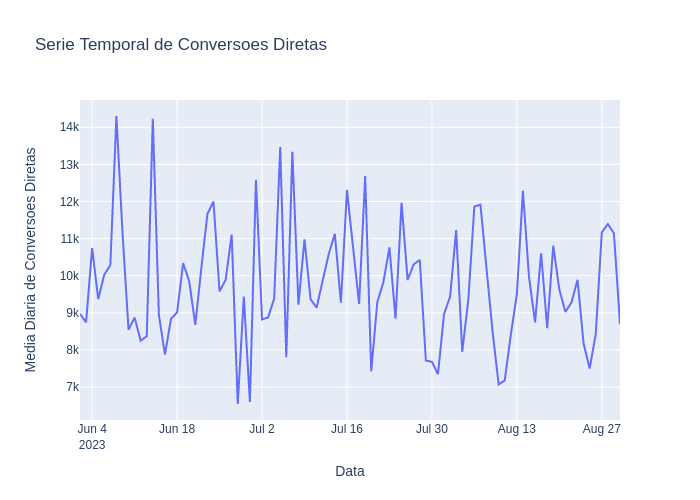

In [13]:
fig = px.line(df_aux, x="date", y="clickThroughConversions", title="Serie Temporal de Conversoes Diretas", hover_name="dia_semana")
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Media Diaria de Conversoes Diretas')

fig.show()

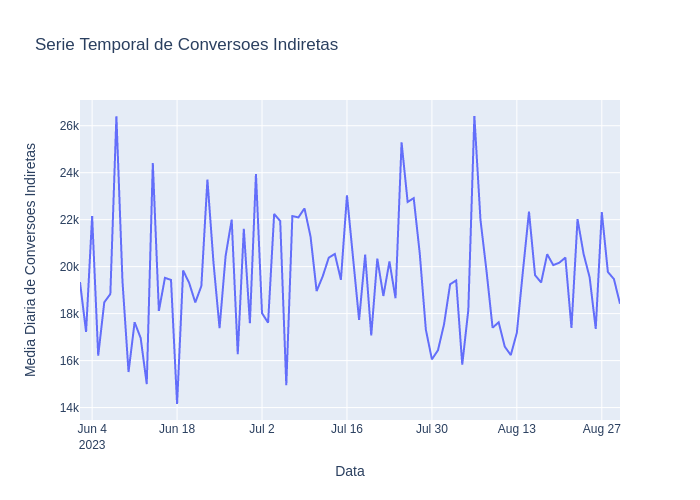

In [14]:
fig = px.line(df_aux, x="date", y="viewThroughConversions", title="Serie Temporal de Conversoes Indiretas", hover_name="dia_semana")
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Media Diaria de Conversoes Indiretas')


fig.show()

<p align="justify"> Analisando visualmente as séries, claramente não há constância no número de conversões, porém essa variação não parece ter um padrão bem definido em relação aos dias da semana. Por exemplo, poderia haver uma sazonalidade com mais conversões em finais de semana, porém isso não acontece. Em outras palavras, não há um padrão claro de determinado período da semana nos picos das séries, nem nos vales (pontos mais baixos), <strong>portanto, não há sazonalidade em relação aos dias de semana.</strong></p>

<p align="justify"> Se extrapolarmos a análise para uma <strong> sazonalidade mensal, é possível observar que nas três séries os finais de cada mês, portanto dias 30 e 31 (quando tiver), estão em pontos de vale.</strong> Porém, é importante observar que contamos com apenas 3 meses de série, ou seja, são poucos dados para que possamos confirmar essa sazonalidade.</p>

Agora vamos prosseguir para outras avaliações quantitativas para avaliar sazonalidade:

Primeiro tendo as estatísticas descritivas de conversões diretas e indiretas não parecem também apontar muitas diferenças em relação ao dia da semana, por exemplo:

In [15]:
df_aux[['clickThroughConversions', 'viewThroughConversions', 'dia_semana']].groupby("dia_semana").describe().reset_index()

dia_semana clickThroughConversions                                     \
                               count          mean          std     min   
0    Domingo                    13.0  10072.461538  1347.873796  7682.0   
1     Quarta                    13.0  10071.153846  2174.487328  6546.0   
2     Quinta                    12.0   9675.166667  2009.358959  7071.0   
3    Segunda                    13.0   9822.615385  1459.754405  7350.0   
4      Sexta                    13.0   9361.307692  2029.727953  6599.0   
5     Sábado                    13.0   9519.461538  1448.634162  7718.0   
6      Terça                    13.0   9895.923077  1010.364164  8371.0   

                                      viewThroughConversions                \
       25%     50%       75%      max                  count          mean   
0  9012.00  9628.0  10981.00  12312.0                   13.0  19786.000000   
1  8694.00  9876.0  10287.00  14232.0                   13.0  19962.923077   
2  8081.75  9826.5  10589.25  14304.0                   12.0  19794.166667   
3  8875.00  9373.0  10779.00  12286.0                   13.0  19217.000000   
4  7876.00  8975.0  11129.00  13337.0                   13.0  19664.307692   
5  8546.00  9223.0   9826.00  12584.0                   13.0  18900.307692   
6  9239.00  9852.0  10195.00  11963.0                   13.0  19659.307692   

                                                               
           std      min       25%      50%       75%      max  
0  3416.792697  14152.0  17382.00  20168.0  22322.00  26414.0  
1  2289.650791  16270.0  18473.00  19587.0  21941.00  24415.0  
2  2966.634452  14947.0  17994.75  19370.0  20806.75  26406.0  
3  1872.467890  16208.0  17613.00  19811.0  20388.00  22004.0  
4  2120.539333  15826.0  19341.00  19540.0  20541.00  23710.0  
5  2346.970898  15513.0  17320.00  18752.0  20065.00  23944.0  
6  2710.196099  15000.0  17732.00  19301.0  22001.00  25291.0

<p align="justify"> Agora partindo para testes estatísticos. Vou utilizar dois testes nesse caso, o <strong>teste de Dickey-Fuller Aumentado (ADF)</strong>, que na realidade é um teste de estacionariedade, porém quando a série é estacionária pode ser um indício da falta de sazonalidade. Além desse teste, vou prosseguir com um teste de <strong>Análise Espectral, utilizando uma Transformada de Fourier</strong>, que é propriamente um teste de sazonalidade. </p>

Primeiramente faremos o teste ADF, utilizando a função `adf_test` que contruí: 

In [16]:
p_valor = 0.01
adf_test(df_aux["clickThroughConversions"], 
         p_valor, 
         "Conversões Diretas")

Teste para Conversões Diretas
Valor de p: 1.0253258270810535e-15


'A série é estacionária com significância de 99.0%.'

In [17]:
adf_test(df_aux["viewThroughConversions"], 
         p_valor, 
         "Conversões Indiretas")

Teste para Conversões Indiretas
Valor de p: 7.83860461001831e-15


'A série é estacionária com significância de 99.0%.'

Como as séries são estacionárias, elas parecem indicar falta de sazonalidade. Agora partindo para o teste Análise Espectral, utilizando uma Transformada de Fourier:

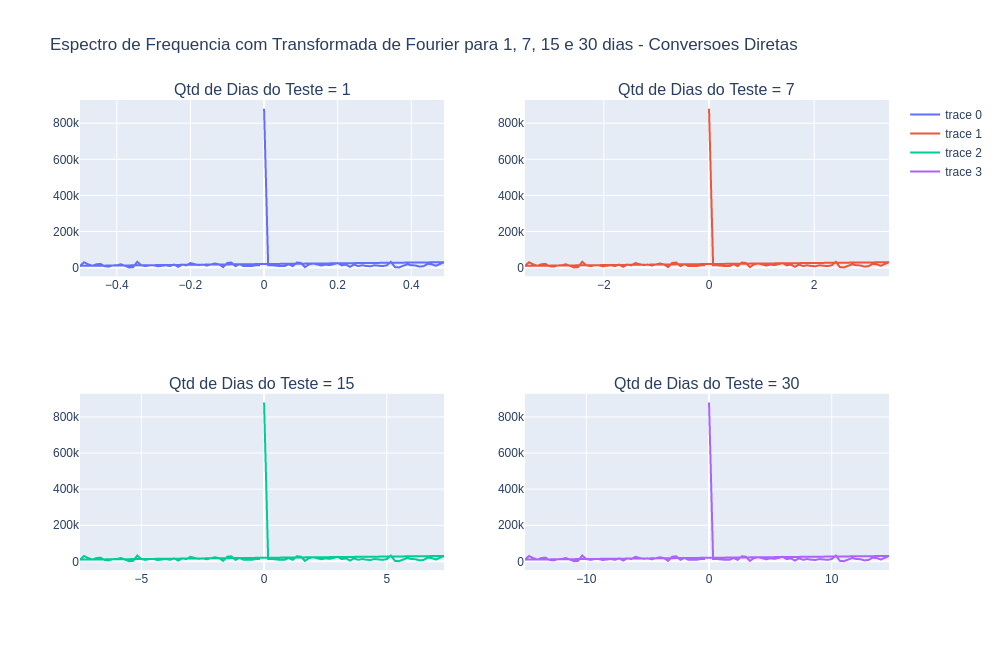

In [18]:
tipo = "Conversoes Diretas"
teste_espectro_fourier(df_aux["clickThroughConversions"], tipo)


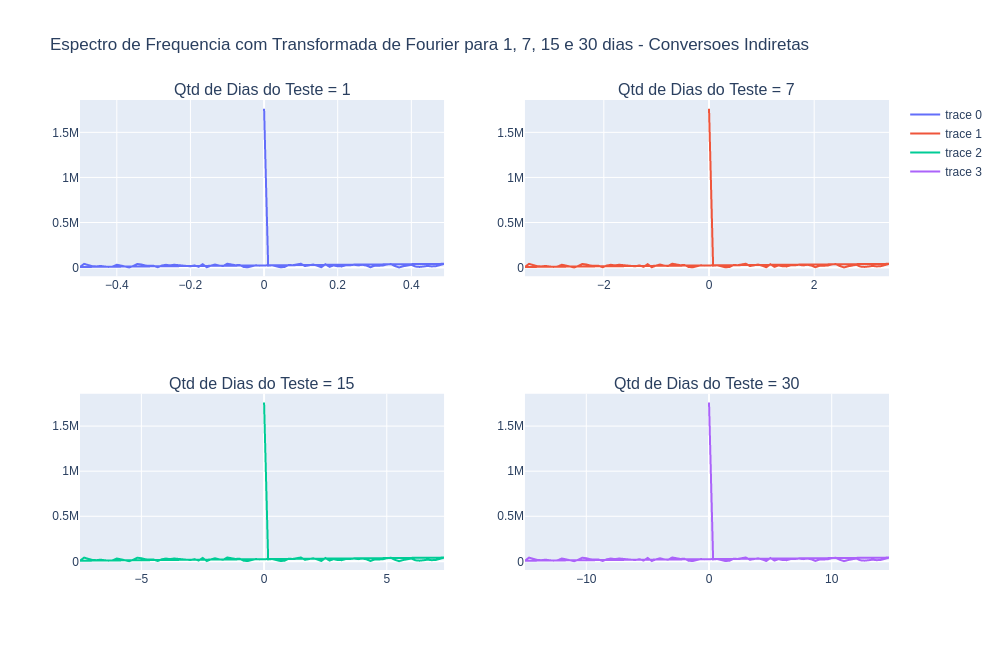

In [19]:
tipo = "Conversoes Indiretas"
teste_espectro_fourier(df_aux["viewThroughConversions"], tipo)


<p align="justify"> A análise espectral com transformada de Fourier é eficaz na detecção de padrões sazonais que têm frequências específicas, mas quando não há componentes de frequência distintos, o espectro de frequência tende a ser plano ou ter um pico central. <strong>Nesses casos, há fortes evidências de não sazonalidade na série, e é exatamente o que acontece no nosso caso, ou seja, há um pico central nessas séries, caracterizando a ausência de sazonalidade. </strong> </p>

Vamos agora avaliar a sazonalidade separando por tipo de criativo:

In [20]:
df_aux2 = df[["date","creativeType", "clickThroughConversions", "viewThroughConversions"]].groupby(["date", "creativeType"]).sum().reset_index()
df_aux2["dia_semana"] = df_aux2["date"].dt.day_name(locale="pt_BR.utf8")

Vou separar em 3 grupos de 3, para facilitar a visualização nos gráficos:

In [21]:
# Classificando os tipos de creativeType com base na contagem
sorted_creative_types = df_aux2['creativeType'].value_counts().index

# Dividindo os tipos em três grupos
group1_creative_types = sorted_creative_types[:3]
group2_creative_types = sorted_creative_types[3:6]
group3_creative_types = sorted_creative_types[6:9]

# DataFrames separados para os três grupos
df_group1 = df_aux2[df_aux2['creativeType'].isin(group1_creative_types)]
df_group2 = df_aux2[df_aux2['creativeType'].isin(group2_creative_types)]
df_group3 = df_aux2[df_aux2['creativeType'].isin(group3_creative_types)]

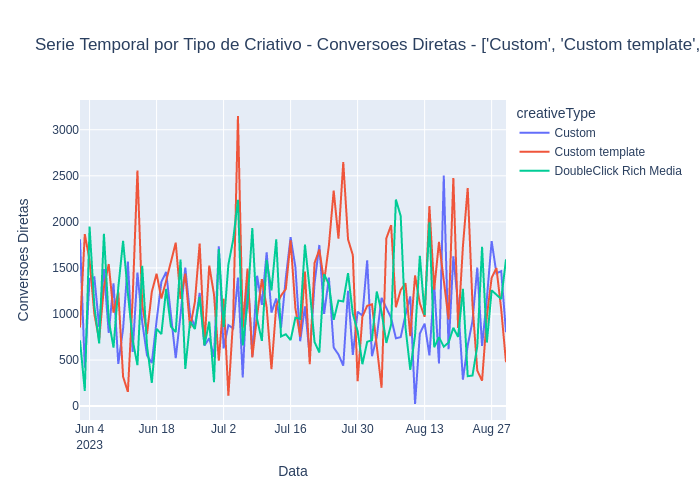

In [22]:
tipo = "Conversoes Diretas"
criativos = df_group1["creativeType"].unique().tolist()

fig = px.line(df_group1, 
              x='date', 
              y='clickThroughConversions', 
              color='creativeType', 
              hover_name="dia_semana",
              title=f"Serie Temporal por Tipo de Criativo - {tipo} - {criativos}")

fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text=tipo)

fig.show()

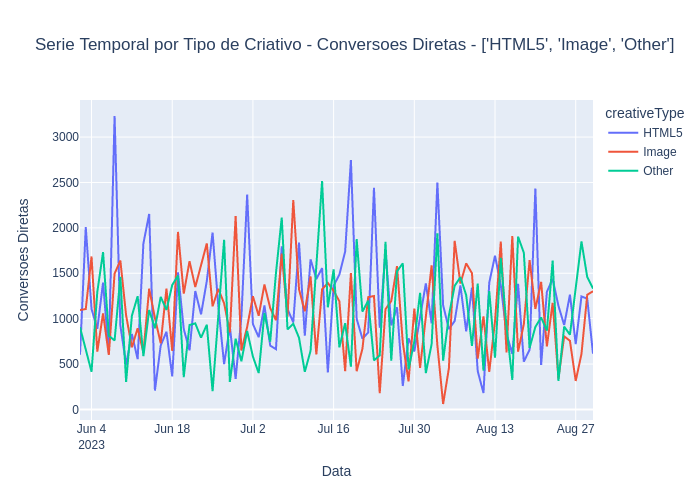

In [23]:
criativos = df_group2["creativeType"].unique().tolist()

fig = px.line(df_group2, 
              x='date', 
              y='clickThroughConversions', 
              color='creativeType', 
              hover_name="dia_semana",
              title=f"Serie Temporal por Tipo de Criativo - {tipo} - {criativos}")

fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text=tipo)

fig.show()

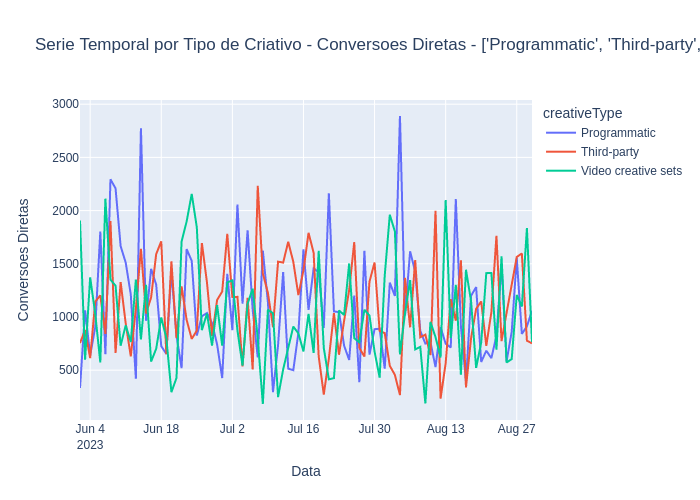

In [24]:
criativos = df_group3["creativeType"].unique().tolist()

fig = px.line(df_group3, 
              x='date', 
              y='clickThroughConversions', 
              color='creativeType', 
              hover_name="dia_semana",
              title=f"Serie Temporal por Tipo de Criativo - {tipo} - {criativos}")

fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text=tipo)

fig.show()

Agora para as conversões indiretas:

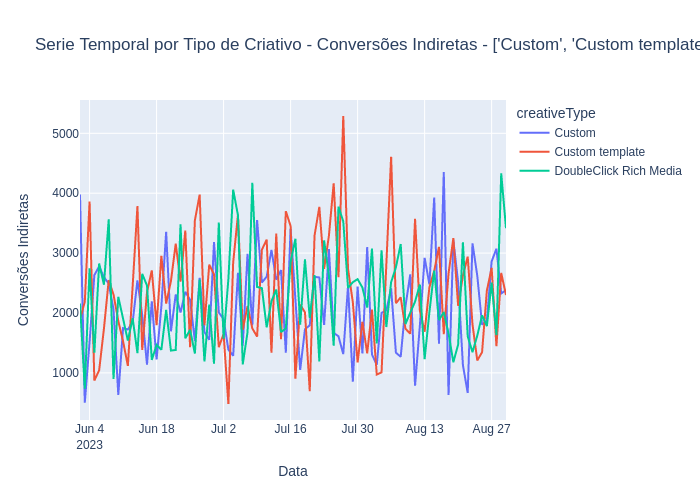

In [25]:
tipo = "Conversões Indiretas"
criativos = df_group1["creativeType"].unique().tolist()

fig = px.line(df_group1, 
              x='date', 
              y='viewThroughConversions', 
              color='creativeType', 
              hover_name="dia_semana",
              title=f"Serie Temporal por Tipo de Criativo - {tipo} - {criativos}")

fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text=tipo)

fig.show()

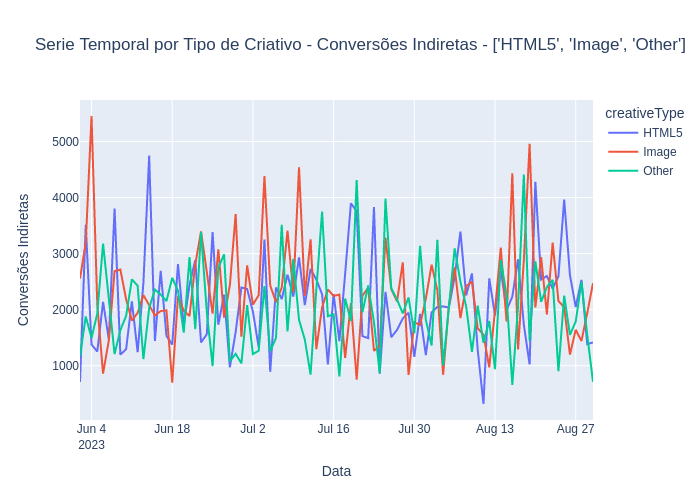

In [26]:
criativos = df_group2["creativeType"].unique().tolist()

fig = px.line(df_group2, 
              x='date', 
              y='viewThroughConversions', 
              color='creativeType', 
              hover_name="dia_semana",
              title=f"Serie Temporal por Tipo de Criativo - {tipo} - {criativos}")

fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text=tipo)

fig.show()

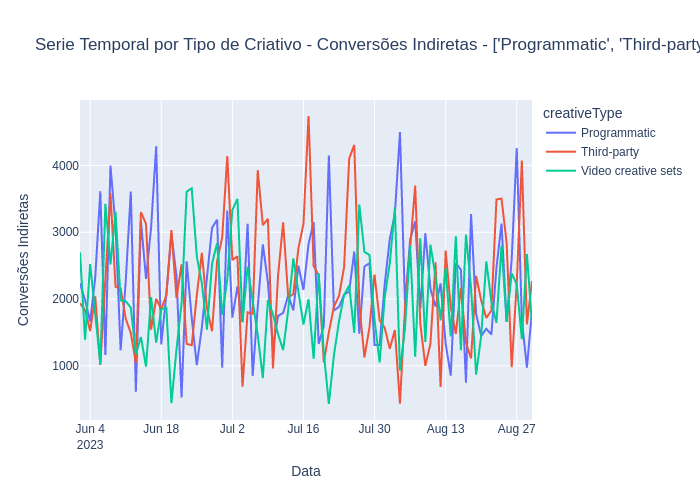

In [27]:
criativos = df_group3["creativeType"].unique().tolist()

fig = px.line(df_group3, 
              x='date', 
              y='viewThroughConversions', 
              color='creativeType', 
              hover_name="dia_semana",
              title=f"Serie Temporal por Tipo de Criativo - {tipo} - {criativos}")

fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text=tipo)

fig.show()

Novamente não há nenhuma sazonalidade aparente nos dados, assim como na análise macro. Agora faremos novamente os testes estatísticos, porém separados por tipo de criativo.

In [28]:
df_Custom = df_aux2[df_aux2["creativeType"]=="Custom"]
df_Custom_template = df_aux2[df_aux2["creativeType"]=="Custom template"]
df_DoubleClick_Rich_Media = df_aux2[df_aux2["creativeType"]=="DoubleClick Rich Media"]
df_HTML5 = df_aux2[df_aux2["creativeType"]=="HTML5"]
df_Image = df_aux2[df_aux2["creativeType"]=="Image"]
df_Other = df_aux2[df_aux2["creativeType"]=="Other"]
df_Programmatic = df_aux2[df_aux2["creativeType"]=="Programmatic"]
df_Third_party = df_aux2[df_aux2["creativeType"]=="Third-party"]
df_Video_creative_sets = df_aux2[df_aux2["creativeType"]=="Video creative sets"]

In [29]:
adf_test(df_Custom["clickThroughConversions"], 
         p_valor, 
         "Conversões Diretas do tipo Custom")

Teste para Conversões Diretas do tipo Custom
Valor de p: 4.486841570125973e-21


'A série é estacionária com significância de 99.0%.'

In [30]:
adf_test(df_Custom_template["clickThroughConversions"], 
         p_valor, 
         "Conversões Diretas do tipo Custom_template")

Teste para Conversões Diretas do tipo Custom_template
Valor de p: 3.3665680980514763e-13


'A série é estacionária com significância de 99.0%.'

In [31]:
adf_test(df_DoubleClick_Rich_Media["clickThroughConversions"], 
         p_valor, 
         "Conversões Diretas do tipo DoubleClick_Rich_Media")

Teste para Conversões Diretas do tipo DoubleClick_Rich_Media
Valor de p: 1.63990382232072e-14


'A série é estacionária com significância de 99.0%.'

In [32]:
adf_test(df_HTML5["clickThroughConversions"], 
         p_valor, 
         "Conversões Diretas do tipo HTML5")

Teste para Conversões Diretas do tipo HTML5
Valor de p: 2.6476342751527374e-18


'A série é estacionária com significância de 99.0%.'

In [33]:
adf_test(df_Image["clickThroughConversions"], 
         p_valor, 
         "Conversões Diretas do tipo Image")

Teste para Conversões Diretas do tipo Image
Valor de p: 2.0839908189373203e-16


'A série é estacionária com significância de 99.0%.'

In [34]:
adf_test(df_Other["clickThroughConversions"], 
         p_valor, 
         "Conversões Diretas do tipo Other")

Teste para Conversões Diretas do tipo Other
Valor de p: 1.8268522384948125e-17


'A série é estacionária com significância de 99.0%.'

In [35]:
adf_test(df_Programmatic["clickThroughConversions"], 
         p_valor, 
         "Conversões Diretas do tipo Programmatic")

Teste para Conversões Diretas do tipo Programmatic
Valor de p: 1.7031156548290455e-16


'A série é estacionária com significância de 99.0%.'

In [36]:
adf_test(df_Third_party["clickThroughConversions"], 
         p_valor, 
         "Conversões Diretas do tipo Third_party")

Teste para Conversões Diretas do tipo Third_party
Valor de p: 7.904781106833426e-15


'A série é estacionária com significância de 99.0%.'

In [37]:
adf_test(df_Video_creative_sets["clickThroughConversions"], 
         p_valor, 
         "Conversões Diretas do tipo Video_creative_sets")

Teste para Conversões Diretas do tipo Video_creative_sets
Valor de p: 1.3372260360091918e-13


'A série é estacionária com significância de 99.0%.'

Agora para as conversões indiretas:

In [38]:
adf_test(df_Custom["viewThroughConversions"], 
         p_valor, 
         "Conversões Indiretas do tipo Custom")

Teste para Conversões Indiretas do tipo Custom
Valor de p: 2.4831632851282347e-21


'A série é estacionária com significância de 99.0%.'

In [39]:
adf_test(df_Custom_template["viewThroughConversions"], 
         p_valor, 
         "Conversões Indiretas do tipo Custom_template")

Teste para Conversões Indiretas do tipo Custom_template
Valor de p: 0.00015952016215658709


'A série é estacionária com significância de 99.0%.'

In [40]:
adf_test(df_HTML5["viewThroughConversions"], 
         p_valor, 
         "Conversões Indiretas do tipo HTML5")

Teste para Conversões Indiretas do tipo HTML5
Valor de p: 3.999412647543304e-19


'A série é estacionária com significância de 99.0%.'

In [41]:
adf_test(df_Image["viewThroughConversions"], 
         p_valor, 
         "Conversões Indiretas do tipo Image")

Teste para Conversões Indiretas do tipo Image
Valor de p: 8.123106320339187e-15


'A série é estacionária com significância de 99.0%.'

In [42]:
adf_test(df_Other["viewThroughConversions"], 
         p_valor, 
         "Conversões Indiretas do tipo Other")

Teste para Conversões Indiretas do tipo Other
Valor de p: 3.137924747905248e-19


'A série é estacionária com significância de 99.0%.'

In [43]:
adf_test(df_Programmatic["viewThroughConversions"], 
         p_valor, 
         "Conversões Indiretas do tipo Programmatic")

Teste para Conversões Indiretas do tipo Programmatic
Valor de p: 1.1750234334812162e-18


'A série é estacionária com significância de 99.0%.'

In [44]:
adf_test(df_Third_party["viewThroughConversions"], 
         p_valor, 
         "Conversões Indiretas do tipo Third_party")

Teste para Conversões Indiretas do tipo Third_party
Valor de p: 1.2306228846895385e-08


'A série é estacionária com significância de 99.0%.'

In [45]:
adf_test(df_Video_creative_sets["viewThroughConversions"], 
         p_valor, 
         "Conversões Indiretas do tipo Video_creative_sets")

Teste para Conversões Indiretas do tipo Video_creative_sets
Valor de p: 1.532816225488306e-13


'A série é estacionária com significância de 99.0%.'

Novamente como as séries são estacionárias, elas parecem indicar falta de sazonalidade. Agora partindo para o teste Análise Espectral, utilizando uma Transformada de Fourier:

Primeiro para as conversões diretas:

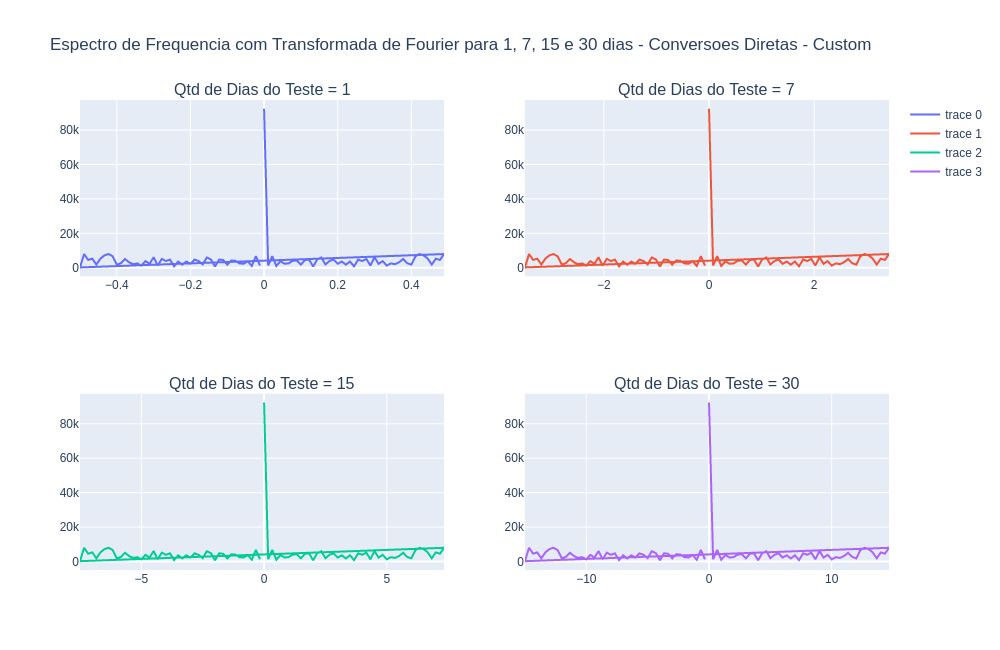

In [46]:
tipo = "Conversoes Diretas - Custom"
teste_espectro_fourier(df_Custom["clickThroughConversions"], tipo)

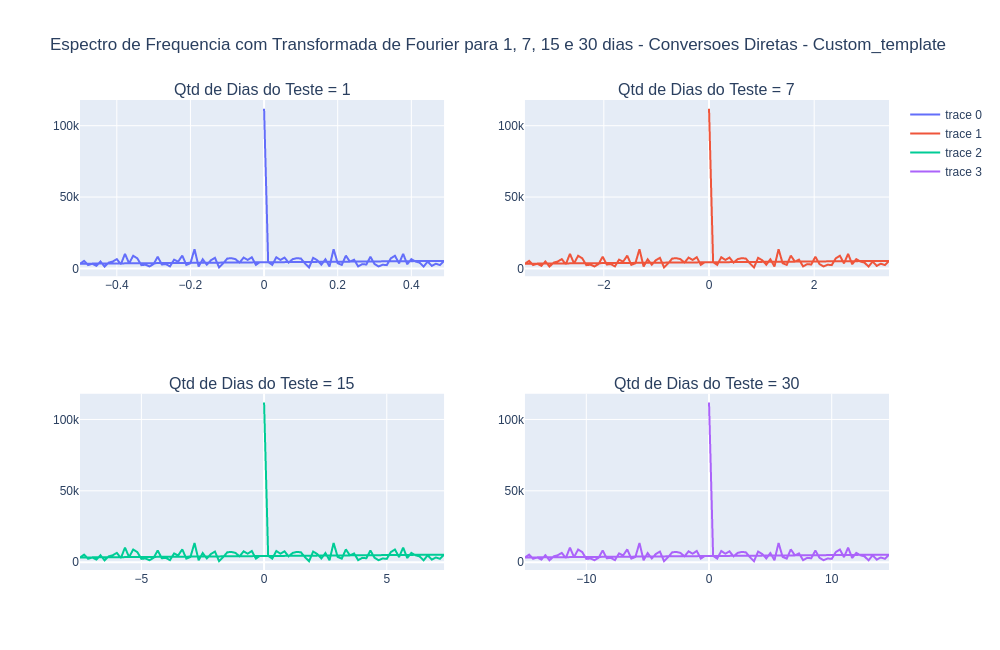

In [47]:
tipo = "Conversoes Diretas - Custom_template"
teste_espectro_fourier(df_Custom_template["clickThroughConversions"], tipo)

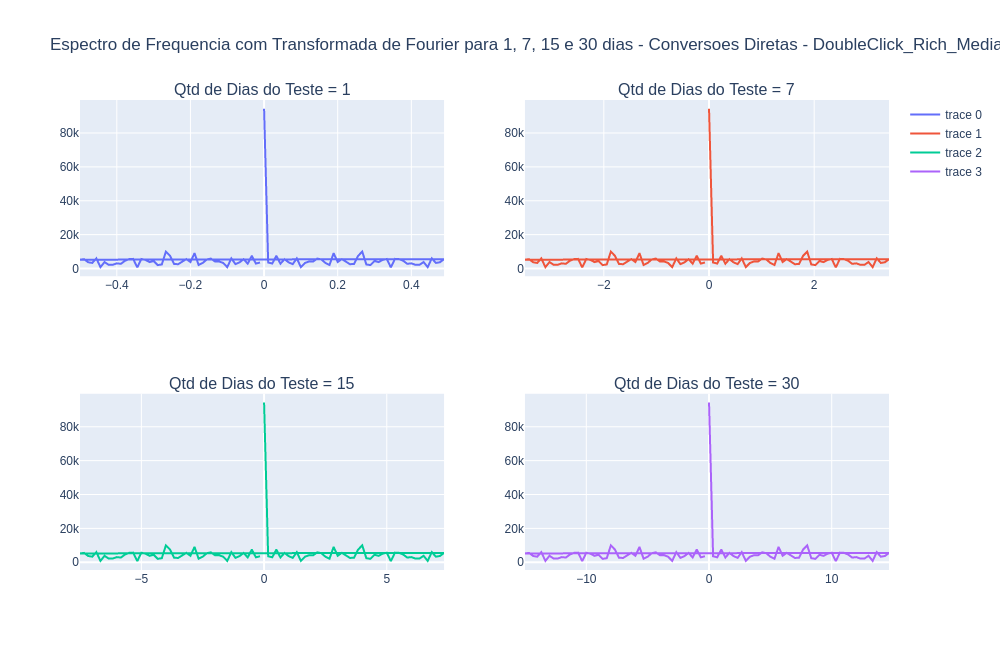

In [48]:
tipo = "Conversoes Diretas - DoubleClick_Rich_Media"
teste_espectro_fourier(df_DoubleClick_Rich_Media["clickThroughConversions"], tipo)

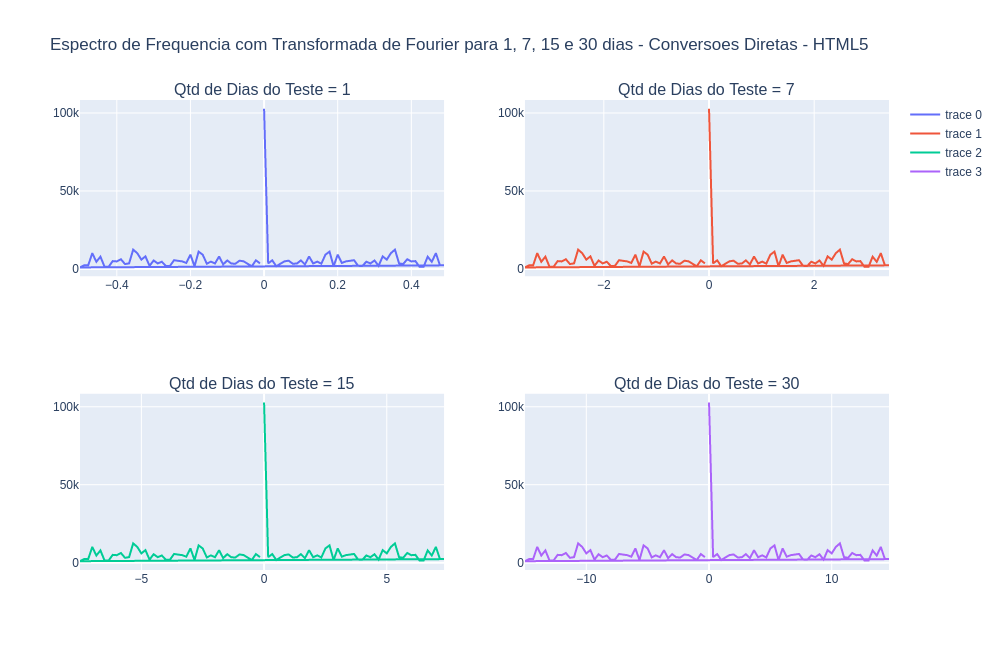

In [49]:
tipo = "Conversoes Diretas - HTML5"
teste_espectro_fourier(df_HTML5["clickThroughConversions"], tipo)

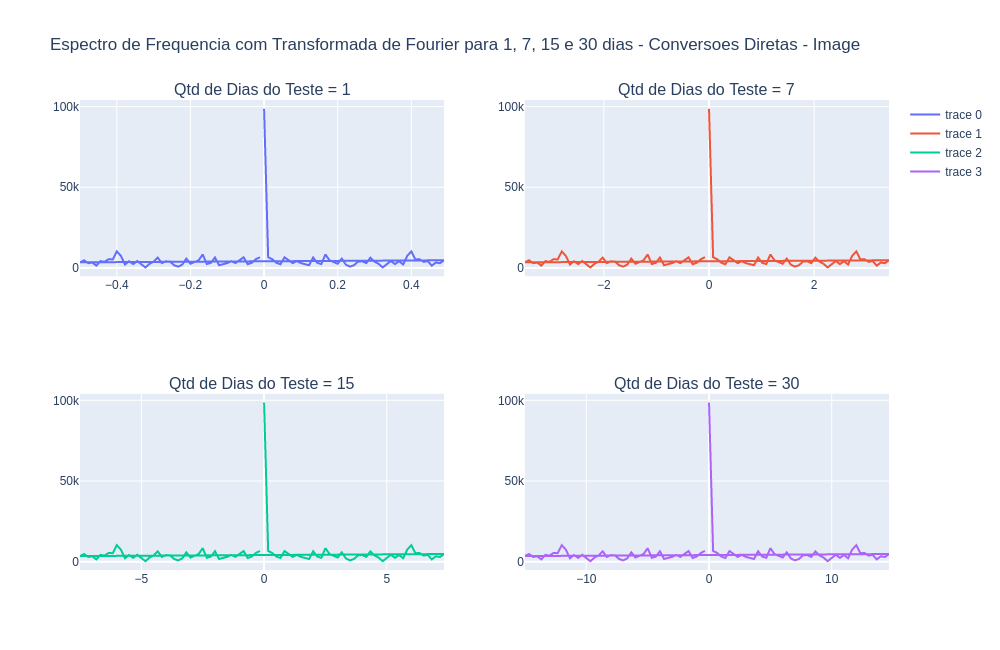

In [50]:
tipo = "Conversoes Diretas - Image"
teste_espectro_fourier(df_Image["clickThroughConversions"], tipo)

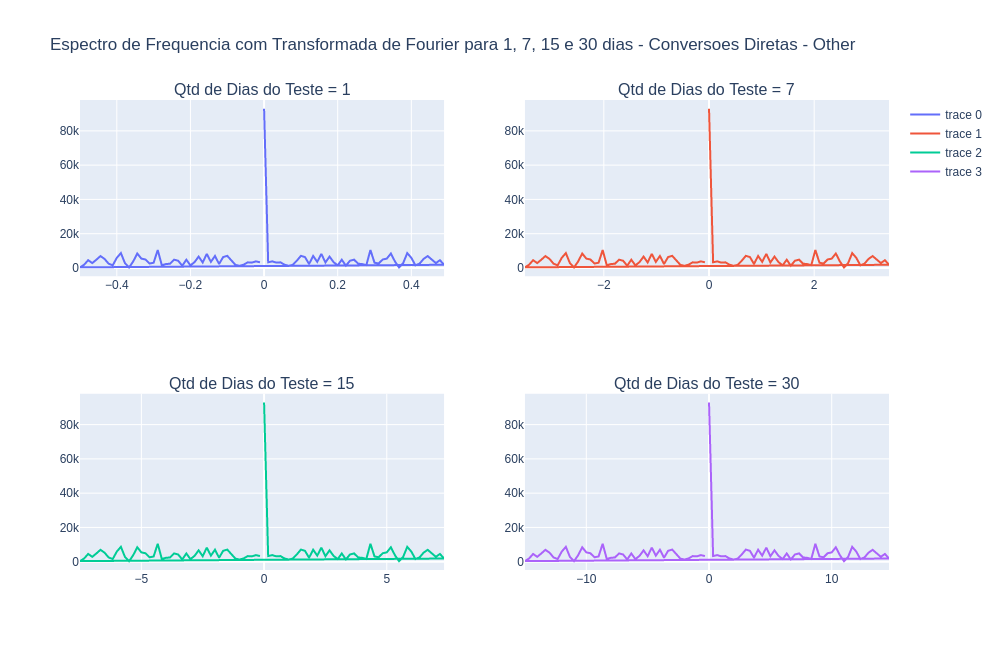

In [51]:
tipo = "Conversoes Diretas - Other"
teste_espectro_fourier(df_Other["clickThroughConversions"], tipo)

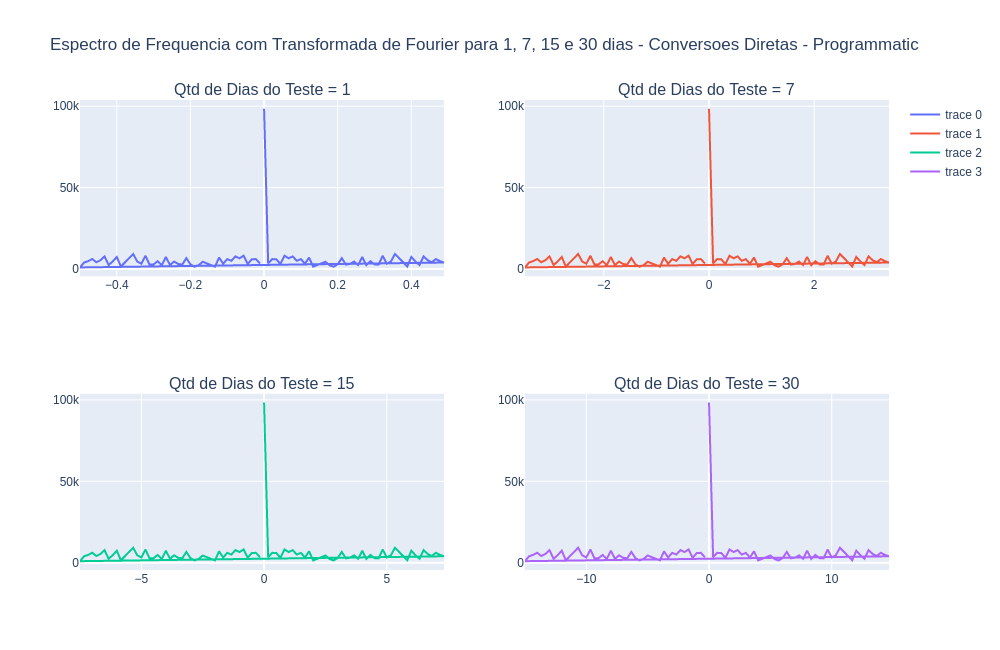

In [52]:
tipo = "Conversoes Diretas - Programmatic"
teste_espectro_fourier(df_Programmatic["clickThroughConversions"], tipo)

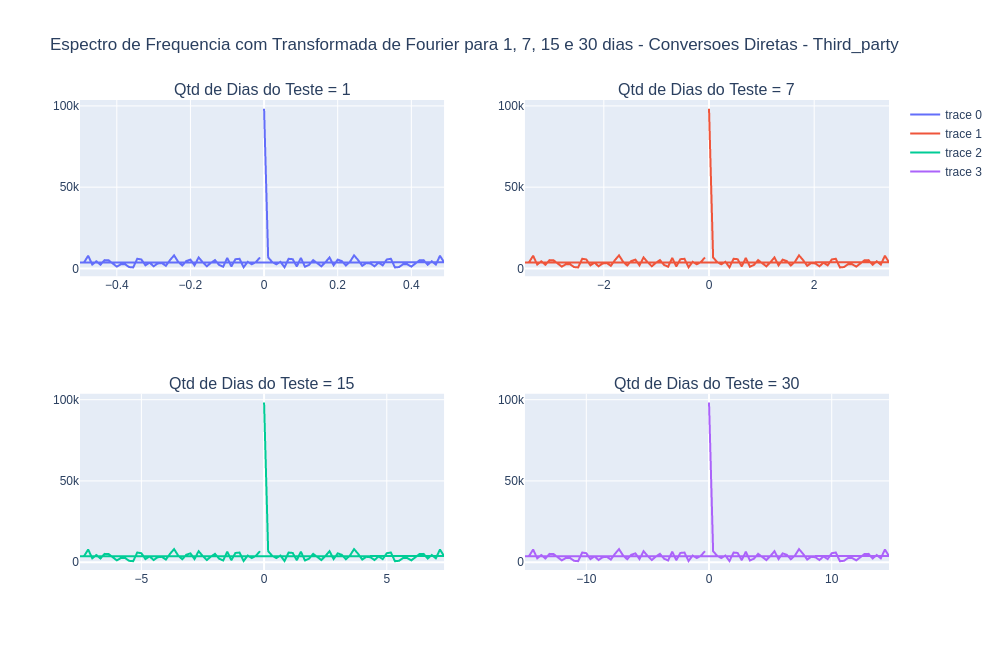

In [53]:
tipo = "Conversoes Diretas - Third_party"
teste_espectro_fourier(df_Third_party["clickThroughConversions"], tipo)

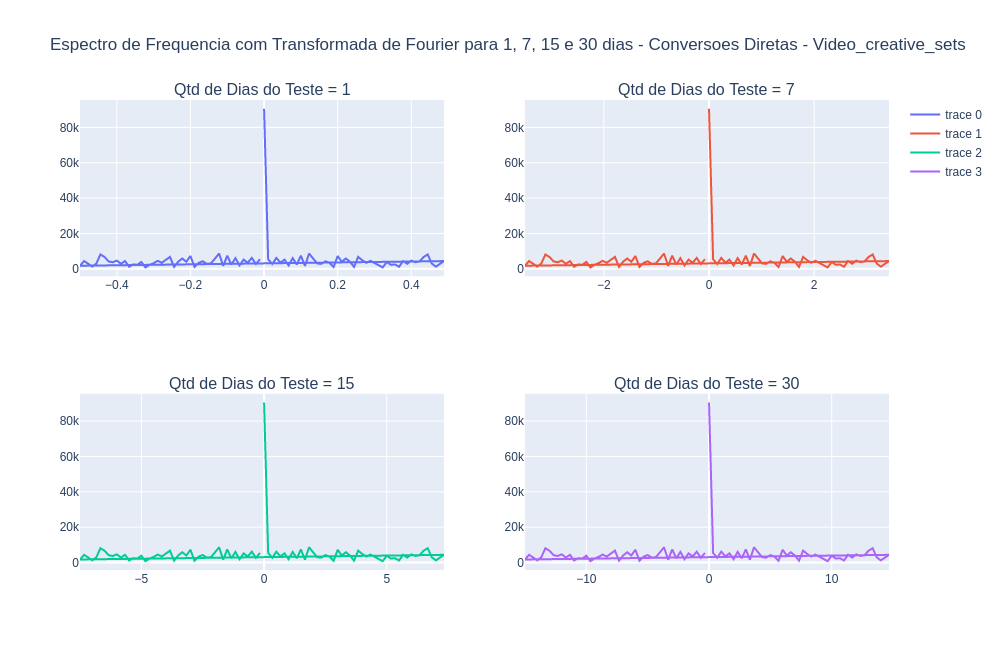

In [54]:
tipo = "Conversoes Diretas - Video_creative_sets"
teste_espectro_fourier(df_Video_creative_sets["clickThroughConversions"], tipo)

Agora, para as conversões indiretas:

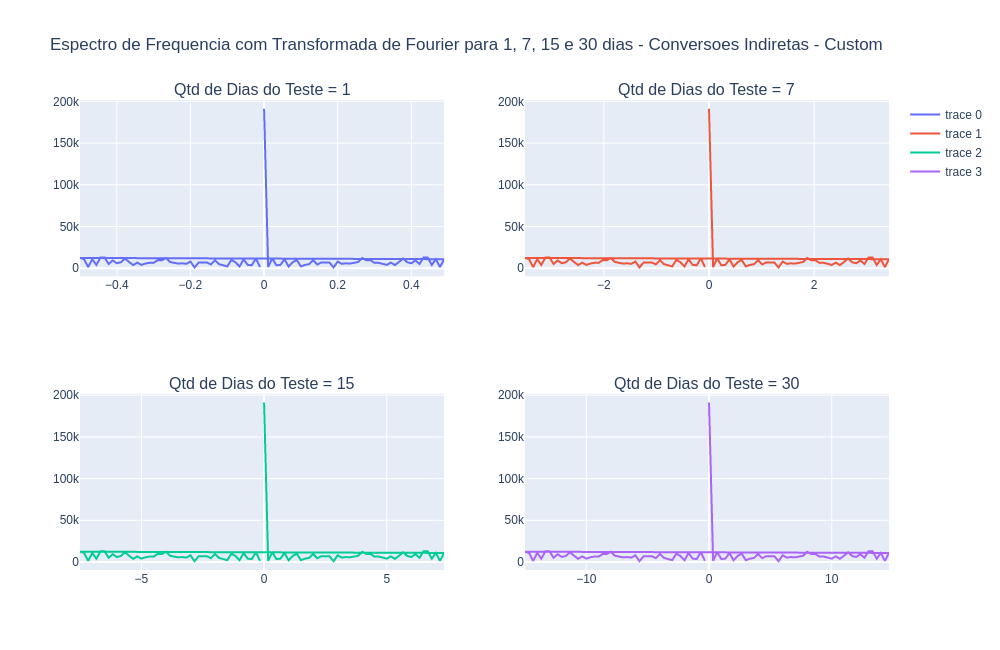

In [55]:
tipo = "Conversoes Indiretas - Custom"
teste_espectro_fourier(df_Custom["viewThroughConversions"], tipo)

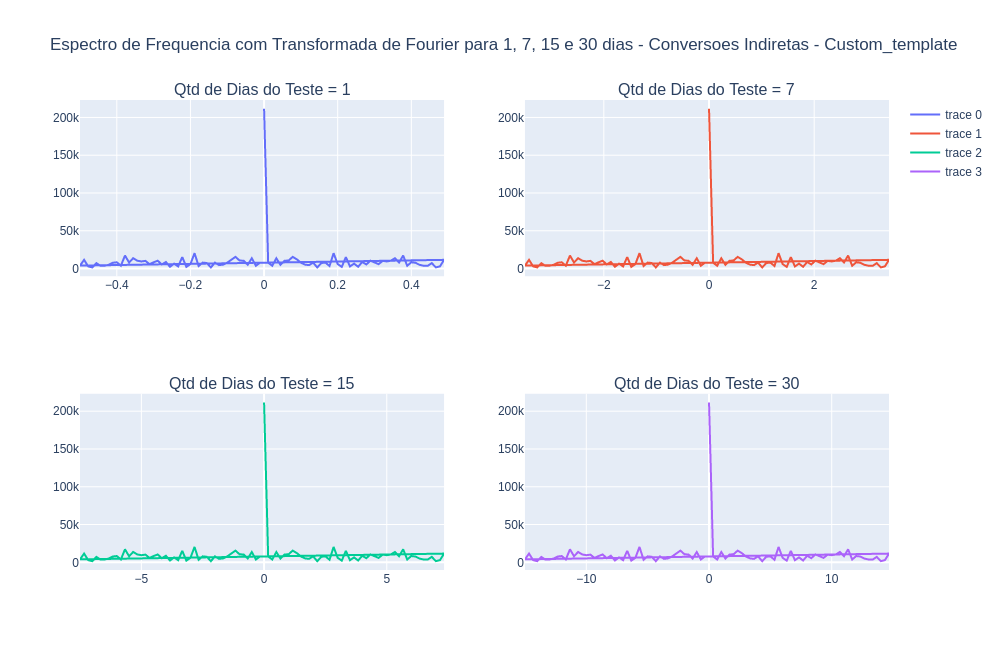

In [56]:
tipo = "Conversoes Indiretas - Custom_template"
teste_espectro_fourier(df_Custom_template["viewThroughConversions"], tipo)

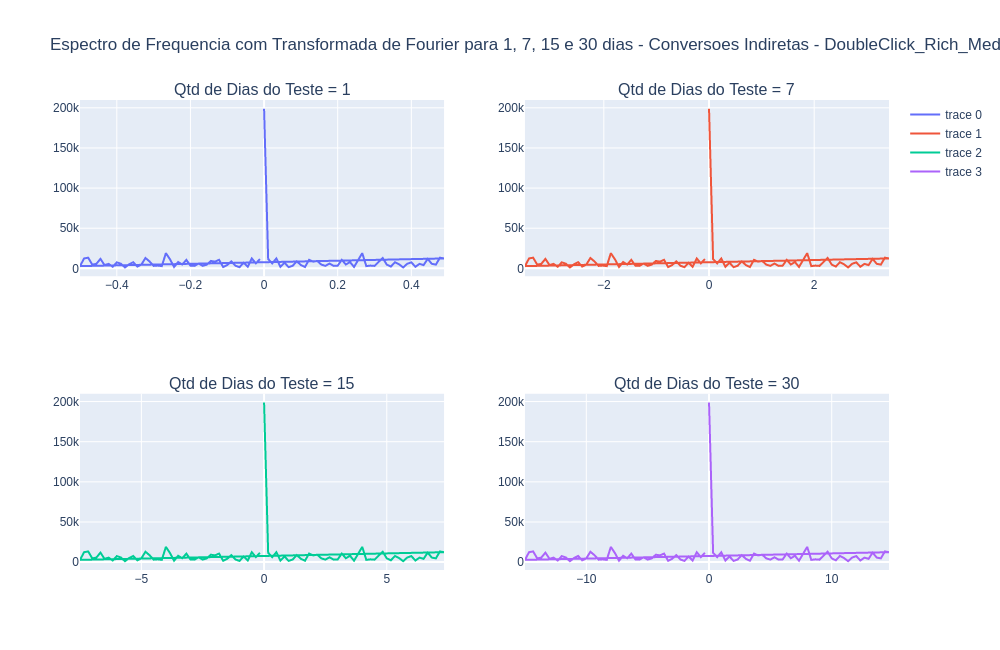

In [57]:
tipo = "Conversoes Indiretas - DoubleClick_Rich_Media"
teste_espectro_fourier(df_DoubleClick_Rich_Media["viewThroughConversions"], tipo)

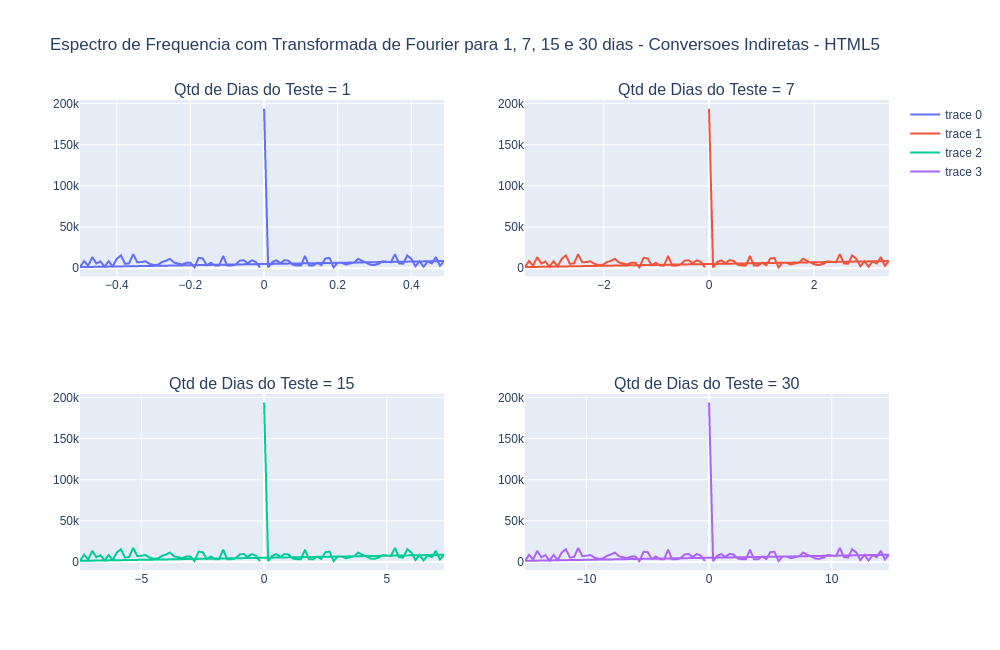

In [58]:
tipo = "Conversoes Indiretas - HTML5"
teste_espectro_fourier(df_HTML5["viewThroughConversions"], tipo)

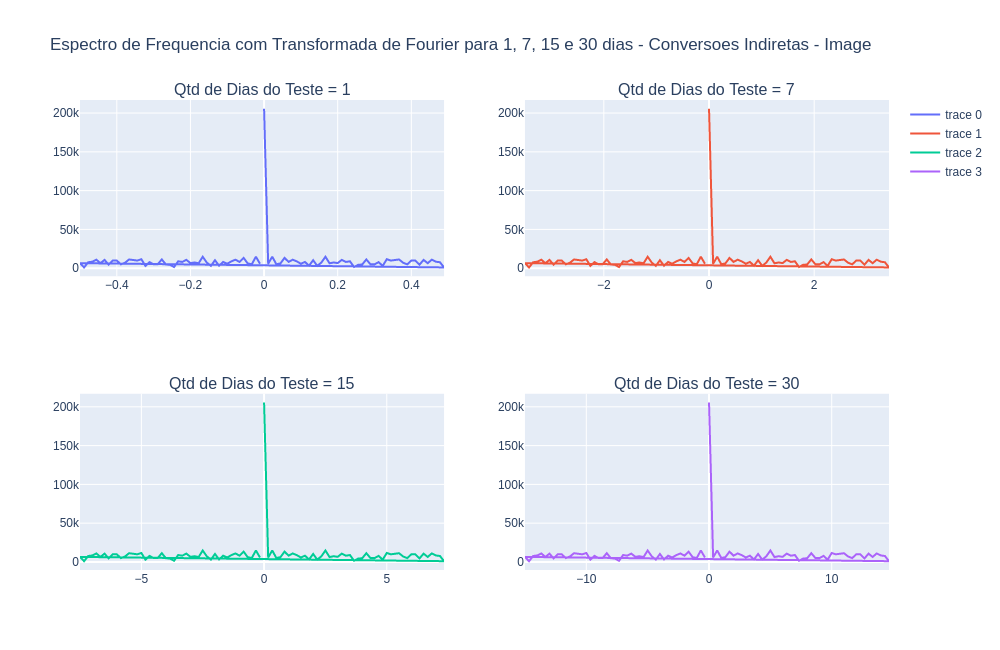

In [59]:
tipo = "Conversoes Indiretas - Image"
teste_espectro_fourier(df_Image["viewThroughConversions"], tipo)

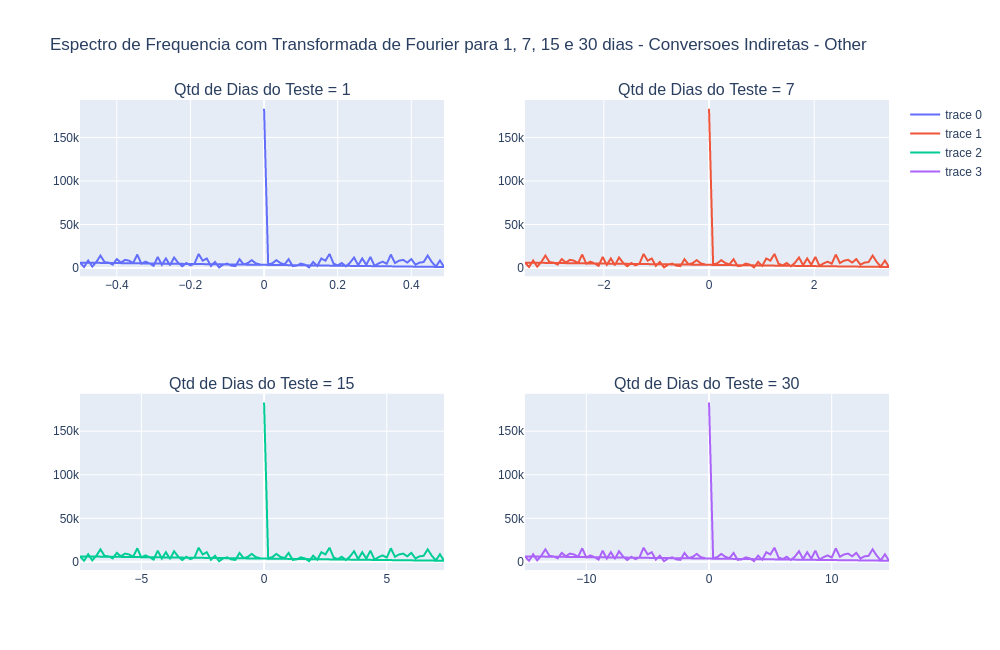

In [60]:
tipo = "Conversoes Indiretas - Other"
teste_espectro_fourier(df_Other["viewThroughConversions"], tipo)

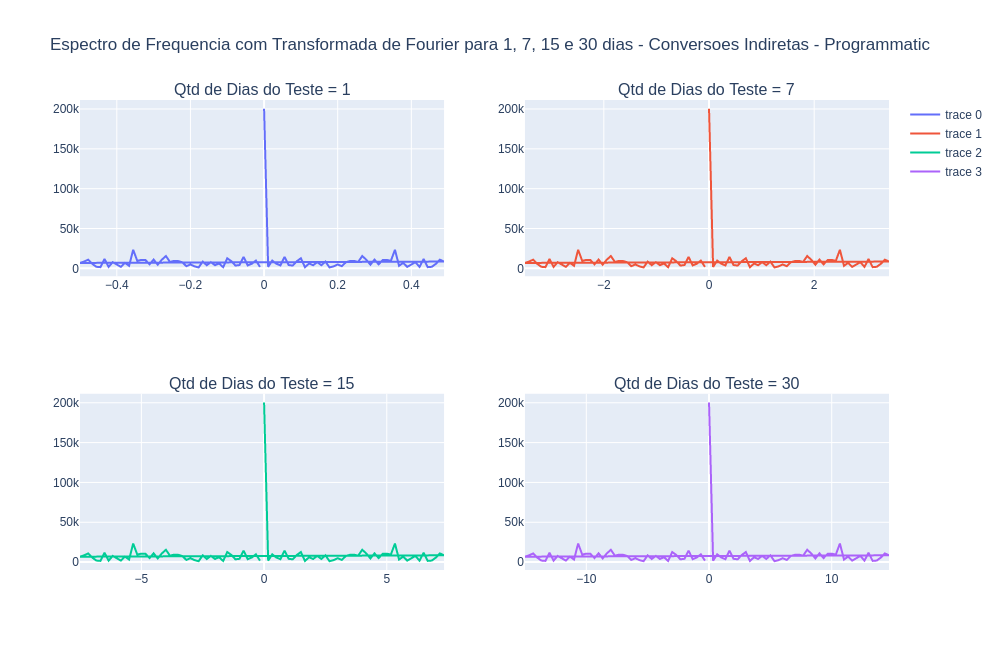

In [61]:
tipo = "Conversoes Indiretas - Programmatic"
teste_espectro_fourier(df_Programmatic["viewThroughConversions"], tipo)

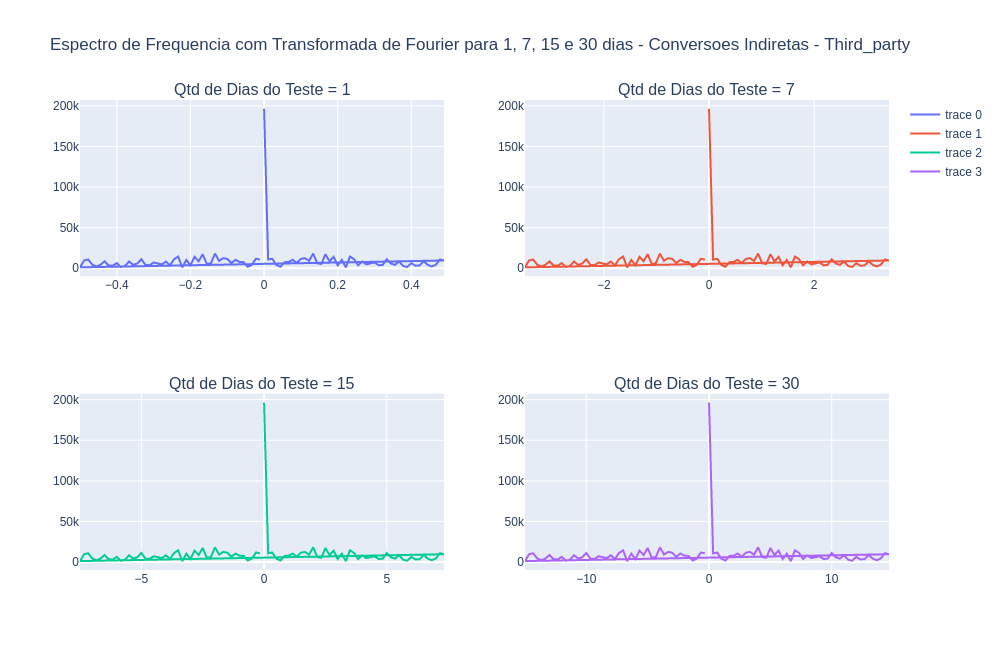

In [62]:
tipo = "Conversoes Indiretas - Third_party"
teste_espectro_fourier(df_Third_party["viewThroughConversions"], tipo)

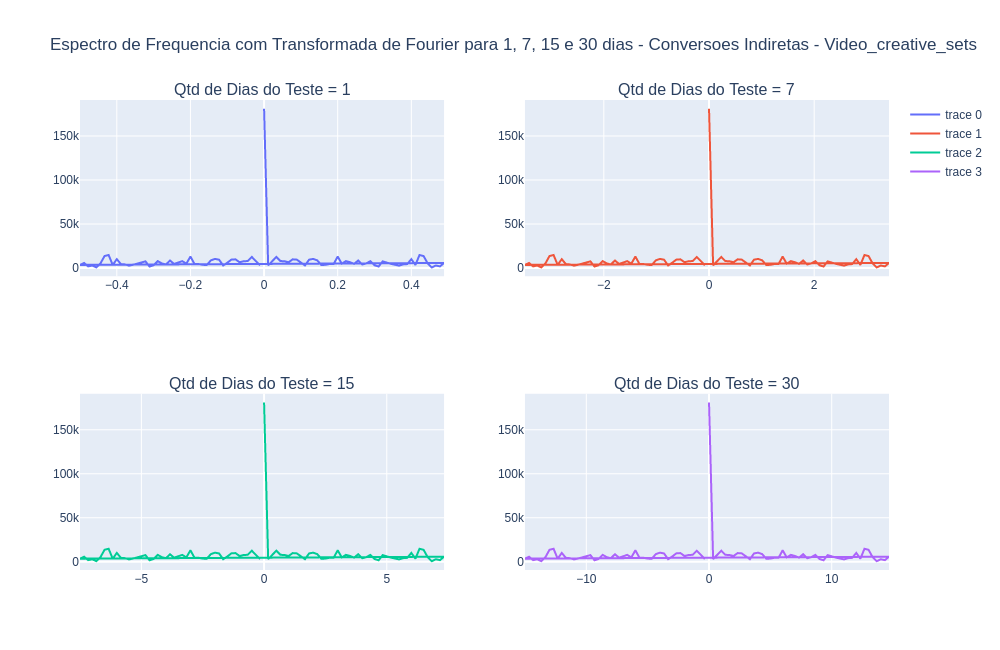

In [63]:
tipo = "Conversoes Indiretas - Video_creative_sets"
teste_espectro_fourier(df_Video_creative_sets["viewThroughConversions"], tipo)

<p align="justify"> <strong>Novamente, agora destrinchando por tipos de criativo, há fortes evidências de não sazonalidade nas séries, por conta do pico central presente nelas. </strong> </p>

<p align="justify"> Portanto, de acordo com os extensos testes realizados (e a inspeção visual), não há evidências de sazonalidade nos dados em termos de conversão, tanto avaliando os dados no nível macro (agrupando todos os tipos de criativos na mesma análise) quanto separando e avaliando individualmente por cada tipo de criativo. É importante definir que a sazonalidade se caracteriza por padrões regulares e repetitivos em um período específico, e isso não foi encontrado, inclusive com testes para 1, 7, 15 e 30 dias.</p>

#### 2.4. **Há algum outlier nos dados que mereça atenção?**